# INF552:Homework5 
### 1. Multi-class and Multi-Label Classification Using Support Vector Machines
##### &nbsp; (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#read csv 
data = pd.read_csv('Frogs_MFCCs.csv', sep = ',', header = 0)

#shuffle and split data into train data and test data
X_train, X_test = train_test_split(data,train_size=0.70, random_state=24)
print(X_train.shape)
print(X_test.shape)

(5036, 26)
(2159, 26)


##### &nbsp; (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:
&nbsp; i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

&nbsp; Exact match (also called Subset accuracy): is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.

&nbsp; Hamming loss: the fraction of the wrong labels to the total number of labels, i.e. {\displaystyle {\frac {1}{|N|\cdot |L|}}\sum _{i=1}^{|N|}\sum _{j=1}^{|L|}\operatorname {xor} (y_{i,j},z_{i,j})} {\displaystyle {\frac {1}{|N|\cdot |L|}}\sum _{i=1}^{|N|}\sum _{j=1}^{|L|}\operatorname {xor} (y_{i,j},z_{i,j})}, where {\displaystyle y_{i,j}} y_{i,j} is the target and {\displaystyle z_{i,j}} z_{{i,j}} is the prediction. This is a loss function, so the optimal value is zero.

&nbsp;ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized 1 and raw attributes and report the results.


In [158]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
#define function to report exact match
list_all = []

def small_para(X_train,y_train,X_test, y_test):
    c_list = [1e-2,1e-1,1]
    gamma_list =[1,2,3]
    for i in c_list:
        for j in gamma_list:
            list_a = []
            svc = SVC(kernel='rbf',gamma = j, C = i)
            svc.fit(X_train, y_train)
            score = svc.score(X_test, y_test)
            list_a.append(i)
            list_a.append(j)
            list_a.append(score)
            list_all.append(list_a)
    return list_all

train_x_f = X_train_b2[list(range(1,23,1))]
train_y_f = X_train_b2['Family']

test_x_f = X_test_b2[list(range(1,23,1))]
test_y_f = X_test_b2['Family']

#build a SVM classifier and print para
list_al = small_para(train_x_f,train_y_f,test_x_f,test_y_f)
print(list_al)

[[0.01, 1, 0.8703103288559518], [0.01, 2, 0.88837424733673], [0.01, 3, 0.8925428439092172], [0.1, 1, 0.9652616952292729], [0.1, 2, 0.9726725335803613], [0.1, 3, 0.968040759610931], [1, 1, 0.9856415006947661], [1, 2, 0.9898100972672533], [1, 3, 0.9902732746641963]]


In [160]:
list_all_large = []
def large_para(X_train,y_train,X_test, y_test):
    c_list = [1,10,100]
    gamma_list =[10,15]
    for i in c_list:
        for j in gamma_list:
            list_a = []
            svc = SVC(kernel='rbf',gamma = j, C = i)
            svc.fit(X_train, y_train)
            score = svc.score(X_test, y_test)
            list_a.append(i)
            list_a.append(j)
            list_a.append(score)
            list_all_large.append(list_a)
    return list_all_large
train_x_f = X_train_b2[list(range(1,23,1))]
train_y_f = X_train_b2['Family']

test_x_f = X_test_b2[list(range(1,23,1))]
test_y_f = X_test_b2['Family']

#build a SVM classifier and print para
list_al_large = large_para(train_x_f,train_y_f,test_x_f,test_y_f)
print(list_al_large)

[[1, 10, 0.9819360815192218], [1, 15, 0.9782306623436776], [10, 10, 0.983788791106994], [10, 15, 0.9791570171375636], [100, 10, 0.983788791106994], [100, 15, 0.9791570171375636]]


From the result above, we can choose c = 100, gamma = 10 as the large pair of parameters. So we decide to make the range of c and gamma as c:[1e-1,1,10,100], gamma:[1,3,5,7,9]

In [335]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 

#define function to report exact match
def best_para(X_train,y_train,X_test, y_test):
    param_grid = {'C': [1e-1,1,10,100],
              'gamma': [1,3,5,7,9] }
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    print("The best parameters are %s with a score of %0.8f"% (grid.best_params_, grid.best_score_))
    score = grid.score(X_test, y_test)
    print('The exact match score is %0.8f'%score)
    pre_result = grid.predict(X_test)
    y_scores=grid.decision_function(X_test)
    
    #confusion matrix
    print(confusion_matrix(pre_result, y_test))
    print('hamming loss is:')
    print(hamming_loss(y_test, pre_result))
    return y_scores, pre_result

#drop recordID
X_train_b2 = X_train.drop(columns=['RecordID'])
X_test_b2 = X_test.drop(columns=['RecordID'])

#rename the features
column_list = []
for i in range(1,23,1):
    column_list.append(i)
column_list.append('Family')
column_list.append('Genus')
column_list.append('Species')
X_train_b2.columns = [column_list]
X_test_b2.columns = [column_list]
    


In [336]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#raw attributes
#SVM for Families
train_x_f = X_train_b2[list(range(1,23,1))]
train_y_f = X_train_b2['Family']

test_x_f = X_test_b2[list(range(1,23,1))]
test_y_f = X_test_b2['Family']

#build a SVM classifier and print para
y_scores_f, result = best_para(train_x_f,train_y_f,test_x_f,test_y_f)
#predict test data and print the accuracy(exact match)



The best parameters are {'C': 10, 'gamma': 3} with a score of 0.99404289
The exact match score is 0.99258916
[[  16    0    0    0]
 [   0  159    0    0]
 [   1    0  610    8]
 [   4    0    3 1358]]
hamming loss is:
0.007410838351088467


In [339]:
test_y_f = X_test_b2['Family']
test_y_f.replace('Bufonidae', 0, inplace = True)
test_y_f.replace('Dendrobatidae', 1, inplace = True)
test_y_f.replace('Hylidae', 2, inplace = True)
test_y_f.replace('Leptodactylidae', 3, inplace = True)

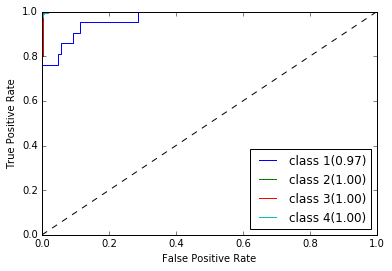

In [340]:
from sklearn.preprocessing import label_binarize
fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin = label_binarize(test_y_f, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin[:, i], y_scores_f[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [354]:
#SVM for Genus******************
train_x_g = X_train_b2[list(range(1,23,1))]
train_y_g = X_train_b2['Genus']

test_x_g = X_test_b2[list(range(1,23,1))]
test_y_g = X_test_b2['Genus']

#build a SVM classifier and print para
y_scores_g,result_g = best_para(train_x_g,train_y_g,test_x_g,test_y_g)
#predict test data and print the accuracy(exact match)

The best parameters are {'C': 10, 'gamma': 3} with a score of 0.99146148
The exact match score is 0.98888374
[[1285    0    3    3    1    0    1    1]
 [   0  159    0    0    0    0    0    0]
 [   3    0   80    0    0    0    0    1]
 [   1    0    0  451    1    3    1    2]
 [   0    0    0    0   75    0    3    0]
 [   0    0    0    0    0   26    0    0]
 [   0    0    0    0    0    0   16    0]
 [   0    0    0    0    0    0    0   43]]
hamming loss is:
0.0111162575266327


In [355]:
test_y_g = X_test_b2['Genus']
test_y_g.replace('Adenomera', 0, inplace = True)
test_y_g.replace('Ameerega', 1, inplace = True)
test_y_g.replace('Dendropsophus', 2, inplace = True)
test_y_g.replace('Hypsiboas', 3, inplace = True)
test_y_g.replace('Leptodactylus',4, inplace = True)
test_y_g.replace('Osteocephalus', 5, inplace = True)
test_y_g.replace('Rhinella', 6, inplace = True)
test_y_g.replace('Scinax', 7, inplace = True)

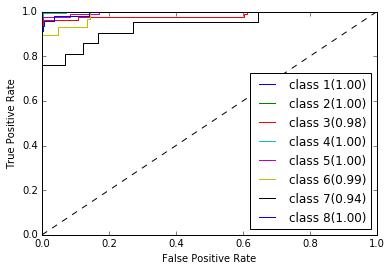

In [356]:
fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin_g = label_binarize(test_y_g, classes=[0, 1, 2, 3,4,5,6,7])
n_classes_g = y_bin_g.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_g):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_g[:, i], y_scores_g[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [357]:
#SVM for Species***********
train_x_s = X_train_b2[list(range(1,23,1))]
train_y_s = X_train_b2['Species']

test_x_s = X_test_b2[list(range(1,23,1))]
test_y_s = X_test_b2['Species']

#build a SVM classifier and print para
y_scores_s, result_s = best_para(train_x_s,train_y_s,test_x_s,test_y_s)
#predict test data and print the accuracy(exact match)

The best parameters are {'C': 10, 'gamma': 3} with a score of 0.99066720
The exact match score is 0.98934692
[[ 205    0    0    0    1    0    0    0    0    1]
 [   0 1080    0    2    0    1    0    0    0    0]
 [   0    0  159    0    0    0    0    0    0    0]
 [   0    3    0   80    0    0    1    0    0    1]
 [   0    0    0    0  134    1    1    3    1    0]
 [   0    1    0    1    1  316    0    0    1    0]
 [   0    0    0    0    0    0   75    0    3    0]
 [   0    0    0    0    0    0    0   26    0    0]
 [   0    0    0    0    0    0    0    0   16    0]
 [   0    0    0    0    0    0    0    0    0   45]]
hamming loss is:
0.010653080129689671


In [358]:
test_y_s = X_test_b2['Species']
test_y_s.replace('AdenomeraAndre', 0, inplace = True)
test_y_s.replace('AdenomeraHylaedactylus', 1, inplace = True)
test_y_s.replace('Ameeregatrivittata', 2, inplace = True)
test_y_s.replace('HylaMinuta', 3, inplace = True)
test_y_s.replace('HypsiboasCinerascens',4, inplace = True)
test_y_s.replace('HypsiboasCordobae', 5, inplace = True)
test_y_s.replace('LeptodactylusFuscus', 6, inplace = True)
test_y_s.replace('OsteocephalusOophagus', 7, inplace = True)
test_y_s.replace('Rhinellagranulosa', 8, inplace = True)
test_y_s.replace('ScinaxRuber', 9, inplace = True)

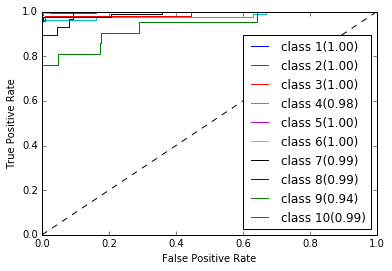

In [359]:
fp_rate= {}
tp_rate= {}
R_Auc= {}
y_bin_s = label_binarize(test_y_s, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes_s = y_bin_s.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_s):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_s[:, i], y_scores_s[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot(fp_rate[8],tp_rate[8],label='class 9(%0.2f)'%R_Auc[8])
plt.plot(fp_rate[9],tp_rate[9],label='class 10(%0.2f)'%R_Auc[9])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [432]:
###all hamming loss
test_y_f = X_test_b2['Family'] 
test_y_g = X_test_b2['Genus']
test_y_s = X_test_b2['Species']
tru_label = []
pre_label = []
test_y_f_list = test_y_f['Family'].values.tolist()
test_y_g_list = test_y_g['Genus'].values.tolist()
test_y_s_list = test_y_s['Species'].values.tolist()
for i in range(len(test_y_f)):
    #print(i)
    arr_list_tru = []
    arr_list_pre = []
    arr_list_tru.append(test_y_f_list[i][0])
    #print(test_y_f_list[i][0])
    arr_list_tru.append(test_y_g_list[i][0])
    arr_list_tru.append(test_y_s_list[i][0])
    arr_list_pre.append(result[i])
    arr_list_pre.append(result_g[i])
    arr_list_pre.append(result_s[i])
    tru_label.append(arr_list_tru)
    pre_label.append(arr_list_pre)
score_list_d2 = []
for i in range(len(test_y_f)):
    score_d2 = hamming_loss(np.array(tru_label[i]), np.array(pre_label[i]))
    score_list_d2.append(score_d2)

print('The sum hamming loss is:')
print(np.mean(score_list_d2))

The sum hamming loss is:
0.009726725335803613


In [384]:
list_all_st = []

def small_para_st(X_train,y_train,X_test, y_test):
    c_list = [1e-1,1,10]
    gamma_list =[0.005,0.01]
    for i in c_list:
        for j in gamma_list:
            list_a = []
            svc = SVC(kernel='rbf',gamma = j, C = i)
            svc.fit(X_train, y_train)
            score = svc.score(X_test, y_test)
            list_a.append(i)
            list_a.append(j)
            list_a.append(score)
            list_all_st.append(list_a)
    return list_all_st

In [385]:
#******standardize********
from sklearn.preprocessing import StandardScaler
train_x_stan = X_train_b2[list(range(1,23,1))]
test_x_stan = X_test_b2[list(range(1,23,1))]
scaler = StandardScaler()
stand_train_x = scaler.fit_transform(train_x_stan)
stand_test_x = scaler.fit_transform(test_x_stan)

train_y_f = X_train_b2['Family']
test_y_f = X_test_b2['Family']

list_al_st = small_para_st(stand_train_x,train_y_f,stand_test_x,test_y_f)
print(list_al_st)

[[0.1, 0.005, 0.9407132931912923], [0.1, 0.01, 0.951366373320982], [1, 0.005, 0.9624826308476147], [1, 0.01, 0.9726725335803613], [10, 0.005, 0.983788791106994], [10, 0.01, 0.9865678554886521]]


From the result above, we can choose c = 10, gamma = 0.005 as the small parameters when accuracy is approximately equals to the threshold 0.98.

In [389]:
list_all_large_st = []
def large_para_st(X_train,y_train,X_test, y_test):
    c_list = [100,1000,10000]
    gamma_list =[0.1,0.2]
    for i in c_list:
        for j in gamma_list:
            list_a = []
            svc = SVC(kernel='rbf',gamma = j, C = i)
            svc.fit(X_train, y_train)
            score = svc.score(X_test, y_test)
            list_a.append(i)
            list_a.append(j)
            list_a.append(score)
            list_all_large_st.append(list_a)
    return list_all_large_st
list_al_large_st = large_para_st(stand_train_x,train_y_f,stand_test_x,test_y_f)
print(list_al_large_st)

[[100, 0.1, 0.9874942102825383], [100, 0.2, 0.9819360815192218], [1000, 0.1, 0.9874942102825383], [1000, 0.2, 0.9819360815192218], [10000, 0.1, 0.9874942102825383], [10000, 0.2, 0.9819360815192218]]


From the result above, we can choose c = 100, gamma = 0.2 as the small parameters when accuracy is approximately equals to the threshold 0.98.

In [390]:
def best_para_st(X_train,y_train,X_test, y_test):
    param_grid = {'C': [10,100],
              'gamma': [0.005,0.025,0.045,0.065,0.085,0.105,0.125,0.145,0.165,0.185,0.205] }
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    print("The best parameters are %s with a score of %0.8f"% (grid.best_params_, grid.best_score_))
    score = grid.score(X_test, y_test)
    print('The exact match score is %0.8f'%score)
    pre_result = grid.predict(X_test)
    y_scores=grid.decision_function(X_test)
    #confusion matrix
    print(confusion_matrix(pre_result, y_test))
    print('hamming loss is:')
    print(hamming_loss(y_test, pre_result))
    return y_scores, pre_result

The best parameters are {'C': 10, 'gamma': 0.045} with a score of 0.99324861
The exact match score is 0.99212598
[[  16    0    0    0]
 [   0  159    0    0]
 [   0    0  609    8]
 [   5    0    4 1358]]
hamming loss is:
0.007874015748031496


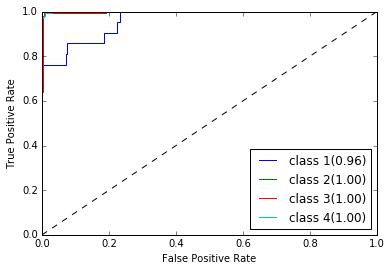

In [391]:

#family
y_scores_fst, result_fst = best_para_st(stand_train_x,train_y_f,stand_test_x,test_y_f)

test_y_f.replace('Bufonidae', 0, inplace = True)
test_y_f.replace('Dendrobatidae', 1, inplace = True)
test_y_f.replace('Hylidae', 2, inplace = True)
test_y_f.replace('Leptodactylidae', 3, inplace = True)

fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin = label_binarize(test_y_f, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin[:, i], y_scores_fst[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()



The best parameters are {'C': 100, 'gamma': 0.045} with a score of 0.99166005
The exact match score is 0.98749421
[[1284    0    2    4    0    2    0    2]
 [   0  159    0    0    0    0    0    0]
 [   3    0   81    0    1    0    0    0]
 [   2    0    0  448    1    3    1    0]
 [   0    0    0    1   75    0    4    0]
 [   0    0    0    1    0   24    0    0]
 [   0    0    0    0    0    0   16    0]
 [   0    0    0    0    0    0    0   45]]
hamming loss is:
0.012505789717461788


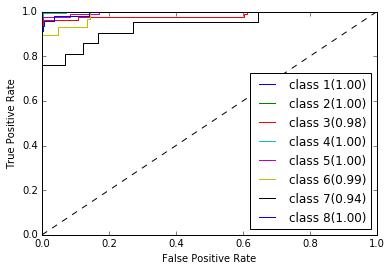

In [392]:
#Genus
train_y_g = X_train_b2['Genus']

test_y_g = X_test_b2['Genus']
y_scores_gst, result_gst = best_para_st(stand_train_x,train_y_g,stand_test_x,test_y_g)

test_y_g.replace('Adenomera', 0, inplace = True)
test_y_g.replace('Ameerega', 1, inplace = True)
test_y_g.replace('Dendropsophus', 2, inplace = True)
test_y_g.replace('Hypsiboas', 3, inplace = True)
test_y_g.replace('Leptodactylus',4, inplace = True)
test_y_g.replace('Osteocephalus', 5, inplace = True)
test_y_g.replace('Rhinella', 6, inplace = True)
test_y_g.replace('Scinax', 7, inplace = True)
fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin_g = label_binarize(test_y_g, classes=[0, 1, 2, 3,4,5,6,7])
n_classes_g = y_bin_g.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_g):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_g[:, i], y_scores_g[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


The best parameters are {'C': 10, 'gamma': 0.045} with a score of 0.99066720
The exact match score is 0.98749421
[[ 204    0    0    0    1    1    0    0    0    1]
 [   0 1079    0    0    0    1    0    0    0    0]
 [   0    0  159    0    0    0    0    0    0    0]
 [   1    3    0   81    0    0    1    0    0    0]
 [   0    0    0    0  132    0    0    4    1    0]
 [   0    2    0    2    1  315    0    0    0    0]
 [   0    0    0    0    1    0   75    0    4    0]
 [   0    0    0    0    1    1    1   25    0    0]
 [   0    0    0    0    0    0    0    0   16    0]
 [   0    0    0    0    0    0    0    0    0   46]]
hamming loss is:
0.012505789717461788


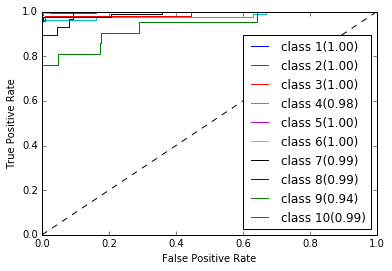

In [393]:
#Species
train_y_s = X_train_b2['Species']
test_y_s = X_test_b2['Species']
y_scores_sst,result_sst = best_para_st(stand_train_x,train_y_s,stand_test_x,test_y_s)

test_y_s = X_test_b2['Species']
test_y_s.replace('AdenomeraAndre', 0, inplace = True)
test_y_s.replace('AdenomeraHylaedactylus', 1, inplace = True)
test_y_s.replace('Ameeregatrivittata', 2, inplace = True)
test_y_s.replace('HylaMinuta', 3, inplace = True)
test_y_s.replace('HypsiboasCinerascens',4, inplace = True)
test_y_s.replace('HypsiboasCordobae', 5, inplace = True)
test_y_s.replace('LeptodactylusFuscus', 6, inplace = True)
test_y_s.replace('OsteocephalusOophagus', 7, inplace = True)
test_y_s.replace('Rhinellagranulosa', 8, inplace = True)
test_y_s.replace('ScinaxRuber', 9, inplace = True)

fp_rate= {}
tp_rate= {}
R_Auc= {}
y_bin_s = label_binarize(test_y_s, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes_s = y_bin_s.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_s):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_s[:, i], y_scores_s[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot(fp_rate[8],tp_rate[8],label='class 9(%0.2f)'%R_Auc[8])
plt.plot(fp_rate[9],tp_rate[9],label='class 10(%0.2f)'%R_Auc[9])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [433]:
###all hamming loss
test_y_f = X_test_b2['Family'] 
test_y_g = X_test_b2['Genus']
test_y_s = X_test_b2['Species']
tru_label = []
pre_label = []
test_y_f_list = test_y_f['Family'].values.tolist()
test_y_g_list = test_y_g['Genus'].values.tolist()
test_y_s_list = test_y_s['Species'].values.tolist()
for i in range(len(test_y_f)):
    #print(i)
    arr_list_tru = []
    arr_list_pre = []
    arr_list_tru.append(test_y_f_list[i][0])
    #print(test_y_f_list[i][0])
    arr_list_tru.append(test_y_g_list[i][0])
    arr_list_tru.append(test_y_s_list[i][0])
    arr_list_pre.append(result_fst[i])
    arr_list_pre.append(result_gst[i])
    arr_list_pre.append(result_sst[i])
    tru_label.append(arr_list_tru)
    pre_label.append(arr_list_pre)
score_list_d2 = []
for i in range(len(test_y_f)):
    score_d2 = hamming_loss(np.array(tru_label[i]), np.array(pre_label[i]))
    score_list_d2.append(score_d2)

print('The sum hamming loss is:')
print(np.mean(score_list_d2))

The sum hamming loss is:
0.010961865060985022


&nbsp;iii. Repeat 1(b)ii and L1-penalized SVMs.2 Remember to standardize3 the at- tributes

In [407]:
test_y_f = X_test_b2['Family']
large_list = []
def large_para_d3(X_train,y_train,X_test, y_test):
    c_list = [1e-3,1e-2,1e-1,1,10]
    for i in c_list:
        list_a = []
        lisvc = LinearSVC(penalty='l1',dual=False,C = i )
        lisvc.fit(X_train, y_train)
        score = lisvc.score(X_test, y_test)
        list_a.append(i)
        list_a.append(score)
        large_list.append(list_a)
    return large_list
large_list = large_para_d3(stand_train_x,train_y_f,stand_test_x,test_y_f)
print(large_list)

[[0.001, 0.8578045391384901], [0.01, 0.9342288096340898], [0.1, 0.9421028253821213], [1, 0.9411764705882353], [10, 0.9402501157943493]]


from the result, we choose 1e-3 as the smallest parameter.

In [442]:
test_y_f = X_test_b2['Family']
small_list = []
def small_para_d3(X_train,y_train,X_test, y_test):
    c_list_l = [100,1000,10000]
    for i in c_list_l:
        list_a = []
        lisvc_l = LinearSVC(penalty='l1',dual=False,C = i )
        lisvc_l.fit(X_train, y_train)
        score_l = lisvc_l.score(X_test, y_test)
        list_a.append(i)
        list_a.append(score_l)
        small_list.append(list_a)
    return small_list
small_list = small_para_d3(stand_train_x,train_y_f,stand_test_x,test_y_f)
print(small_list)

[[100, 0.9397869383974062], [1000, 0.9397869383974062], [10000, 0.9397869383974062]]


From the result above, I choose the 10000 as the largest parameter. So the range will be [1e-3,1e-2,1e-1,1,10,100,1000,10000].

In [449]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#define a function to choose the best C parameter and fill it into the new kmeans,
#finally get the score and predict result
def best_para_3(X_train,y_train,X_test, y_test):
    param_grid = {'C': [1e-3,1e-2,1e-1,1,10,100,1000,10000] }
    grid = GridSearchCV(LinearSVC(penalty='l1',dual=False ), param_grid, cv=10, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    print("The best parameters are %s with a score of %0.8f"% (grid.best_params_, grid.best_score_))
    score = grid.score(X_test, y_test)
    print('The exact match score is %0.8f'%score)
    pre_result = grid.predict(X_test)
    y_scores=grid.decision_function(X_test)
    print('hamming loss is:')
    print(hamming_loss(y_test, pre_result))
    #confusion matrix
    print(confusion_matrix(pre_result, y_test))
    print('Precision score is:')
    print(precision_score(y_test, pre_result, average='micro'))
    print('Recall score is:')
    print(recall_score(y_test, pre_result, average='micro') )
    return y_scores,pre_result

The best parameters are {'C': 1} with a score of 0.93010326
The exact match score is 0.94117647
hamming loss is:
0.058823529411764705
[[   0    0    1    0]
 [   0  144    7   12]
 [  16   14  563   29]
 [   5    1   42 1325]]
Precision score is:
0.9411764705882353
Recall score is:
0.9411764705882353


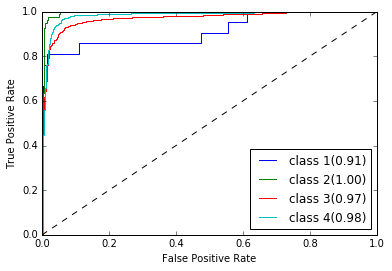

In [444]:
#standarlize the data
train_x_stan = X_train_b2[list(range(1,23,1))]
test_x_stan = X_test_b2[list(range(1,23,1))]
scaler = StandardScaler()
stand_train_x = scaler.fit_transform(train_x_stan)
stand_test_x = scaler.fit_transform(test_x_stan)

train_y_f = X_train_b2['Family']
test_y_f = X_test_b2['Family']
#family
y_scores_fst,result_d3f = best_para_3(stand_train_x,train_y_f,stand_test_x,test_y_f)

test_y_f.replace('Bufonidae', 0, inplace = True)
test_y_f.replace('Dendrobatidae', 1, inplace = True)
test_y_f.replace('Hylidae', 2, inplace = True)
test_y_f.replace('Leptodactylidae', 3, inplace = True)

fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin = label_binarize(test_y_f, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin[:, i], y_scores_fst[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()



The best parameters are {'C': 10} with a score of 0.95214456
The exact match score is 0.95507179
hamming loss is:
0.04492820750347383
[[1268    1   22    6    0    0    5    0]
 [   8  152    4    0    0    0    0    0]
 [   4    5   54    0    2    0    0    0]
 [   8    1    2  446    4   16    1    2]
 [   0    0    0    2   70    0    0    0]
 [   0    0    0    0    1   12    0    0]
 [   0    0    0    0    0    1   15    0]
 [   1    0    1    0    0    0    0   45]]
Precision score is:
0.9550717924965262
Recall score is:
0.9550717924965262


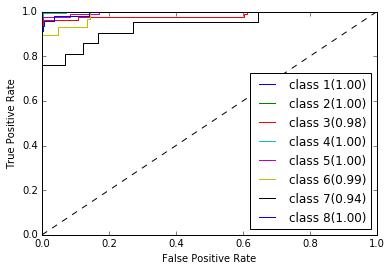

In [416]:
#Genus
train_y_g = X_train_b2['Genus']

test_y_g = X_test_b2['Genus']
y_scores_gst,result_d3g = best_para_3(stand_train_x,train_y_g,stand_test_x,test_y_g)

test_y_g.replace('Adenomera', 0, inplace = True)
test_y_g.replace('Ameerega', 1, inplace = True)
test_y_g.replace('Dendropsophus', 2, inplace = True)
test_y_g.replace('Hypsiboas', 3, inplace = True)
test_y_g.replace('Leptodactylus',4, inplace = True)
test_y_g.replace('Osteocephalus', 5, inplace = True)
test_y_g.replace('Rhinella', 6, inplace = True)
test_y_g.replace('Scinax', 7, inplace = True)
fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin_g = label_binarize(test_y_g, classes=[0, 1, 2, 3,4,5,6,7])
n_classes_g = y_bin_g.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_g):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_g[:, i], y_scores_g[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()



The best parameters are {'C': 100} with a score of 0.95750596
The exact match score is 0.96387216
hamming loss is:
0.036127836961556276
[[ 197    0    0    7    0    0    1    1    5    0]
 [   0 1078    0    5    0    2    0    0    0    0]
 [   5    3  152    7    0    0    0    0    0    0]
 [   1    1    5   60    0    0    2    0    0    0]
 [   0    1    0    0  135    3    0    3    0    0]
 [   2    0    2    3    0  311    3    9    0    1]
 [   0    0    0    0    1    1   71    0    0    0]
 [   0    0    0    0    0    0    0   15    0    0]
 [   0    0    0    0    0    1    0    1   16    0]
 [   0    1    0    1    0    0    0    0    0   46]]
Precision score is:
0.9638721630384437
Recall score is:
0.9638721630384437


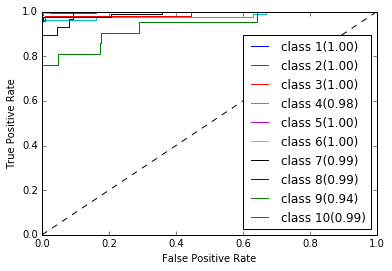

In [415]:
#Species
train_y_s = X_train_b2['Species']
test_y_s = X_test_b2['Species']
y_scores_sst,result_d3s = best_para_3(stand_train_x,train_y_s,stand_test_x,test_y_s)

test_y_s = X_test_b2['Species']
test_y_s.replace('AdenomeraAndre', 0, inplace = True)
test_y_s.replace('AdenomeraHylaedactylus', 1, inplace = True)
test_y_s.replace('Ameeregatrivittata', 2, inplace = True)
test_y_s.replace('HylaMinuta', 3, inplace = True)
test_y_s.replace('HypsiboasCinerascens',4, inplace = True)
test_y_s.replace('HypsiboasCordobae', 5, inplace = True)
test_y_s.replace('LeptodactylusFuscus', 6, inplace = True)
test_y_s.replace('OsteocephalusOophagus', 7, inplace = True)
test_y_s.replace('Rhinellagranulosa', 8, inplace = True)
test_y_s.replace('ScinaxRuber', 9, inplace = True)

fp_rate= {}
tp_rate= {}
R_Auc= {}
y_bin_s = label_binarize(test_y_s, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes_s = y_bin_s.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_s):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_s[:, i], y_scores_s[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot(fp_rate[8],tp_rate[8],label='class 9(%0.2f)'%R_Auc[8])
plt.plot(fp_rate[9],tp_rate[9],label='class 10(%0.2f)'%R_Auc[9])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [434]:
###all hamming loss
test_y_f = X_test_b2['Family'] 
test_y_g = X_test_b2['Genus']
test_y_s = X_test_b2['Species']
tru_label = []
pre_label = []
test_y_f_list = test_y_f['Family'].values.tolist()
test_y_g_list = test_y_g['Genus'].values.tolist()
test_y_s_list = test_y_s['Species'].values.tolist()
for i in range(len(test_y_f)):
    #print(i)
    arr_list_tru = []
    arr_list_pre = []
    arr_list_tru.append(test_y_f_list[i][0])
    #print(test_y_f_list[i][0])
    arr_list_tru.append(test_y_g_list[i][0])
    arr_list_tru.append(test_y_s_list[i][0])
    arr_list_pre.append(result_d3f[i])
    arr_list_pre.append(result_d3g[i])
    arr_list_pre.append(result_d3s[i])
    tru_label.append(arr_list_tru)
    pre_label.append(arr_list_pre)
score_list_d2 = []
for i in range(len(test_y_f)):
    score_d2 = hamming_loss(np.array(tru_label[i]), np.array(pre_label[i]))
    score_list_d2.append(score_d2)

print('The sum hamming loss is:')
print(np.mean(score_list_d2))

The sum hamming loss is:
0.04662652462559826


&nbsp; iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.


In [435]:
from imblearn.over_sampling import SMOTE
#initialize smote function
smo1 = SMOTE(k_neighbors =2)
smo2 = SMOTE(k_neighbors =2)


In [445]:
train_x_stan = X_train_b2[list(range(1,23,1))]
test_x_stan = X_test_b2[list(range(1,23,1))]

#standardize
scaler = StandardScaler()
stand_train_x = scaler.fit_transform(train_x_stan)
stand_test_x = scaler.fit_transform(test_x_stan)
train_y_f = X_train_b2['Family']
test_y_f = X_test_b2['Family']

#smote
X_train_b4, y_train_b4 = smo1.fit_sample(stand_train_x, train_y_f)
X_test_b4, y_test_b4 = smo2.fit_sample(stand_test_x , test_y_f)

#family
y_scores_fst,result_smof = best_para_3(X_train_b4,y_train_b4,X_test_b4, y_test_b4)


The best parameters are {'C': 1} with a score of 0.95039293
The exact match score is 0.89787701
hamming loss is:
0.1021229868228404
[[1042    0   33   13]
 [   0 1359   53   25]
 [   0    7 1218   41]
 [ 324    0   62 1287]]
Precision score is:
0.8978770131771596
Recall score is:
0.8978770131771596


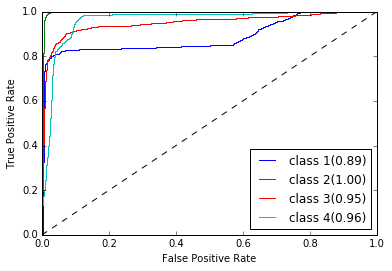

In [446]:
y_test_b4_df=pd.DataFrame(y_test_b4)
y_test_b4_df.replace('Bufonidae', 0, inplace = True)
y_test_b4_df.replace('Dendrobatidae', 1, inplace = True)
y_test_b4_df.replace('Hylidae', 2, inplace = True)
y_test_b4_df.replace('Leptodactylidae', 3, inplace = True)

fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin_f4 = label_binarize(y_test_b4_df, classes=[0, 1, 2, 3])
n_classes_d4 = y_bin_f4.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_d4):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_f4[:, i], y_scores_fst[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()





In [447]:
#Genus
train_y_g = X_train_b2['Genus']
test_y_g = X_test_b2['Genus']
#smote
X_train_g4, y_train_g4 = smo1.fit_sample(stand_train_x, train_y_g)
X_test_g4, y_test_g4 = smo2.fit_sample(stand_test_x , test_y_g)

y_scores_gst,result_smog = best_para_3(X_train_g4, y_train_g4,X_test_g4, y_test_g4)


The best parameters are {'C': 10} with a score of 0.96098392
The exact match score is 0.91398371
hamming loss is:
0.08601629169899147
[[1176    0   31   16    0    9  249    0]
 [  24 1259   37    0    0    0    0    0]
 [  47   30 1204    0   19    1    0    0]
 [   9    0    0 1231   19  169    0    0]
 [   1    0    1    7 1242   28   44    0]
 [  25    0    0   26    8 1028    0    0]
 [   6    0    8    7    1   54  996    0]
 [   1    0    8    2    0    0    0 1289]]
Precision score is:
0.9139837083010085
Recall score is:
0.9139837083010085


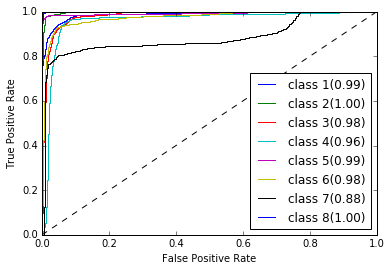

In [448]:

y_test_g4_df=pd.DataFrame(y_test_g4)

y_test_g4_df.replace('Adenomera', 0, inplace = True)
y_test_g4_df.replace('Ameerega', 1, inplace = True)
y_test_g4_df.replace('Dendropsophus', 2, inplace = True)
y_test_g4_df.replace('Hypsiboas', 3, inplace = True)
y_test_g4_df.replace('Leptodactylus',4, inplace = True)
y_test_g4_df.replace('Osteocephalus', 5, inplace = True)
y_test_g4_df.replace('Rhinella', 6, inplace = True)
y_test_g4_df.replace('Scinax', 7, inplace = True)
fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}
y_bin_g4 = label_binarize(y_test_g4_df, classes=[0, 1, 2, 3,4,5,6,7])
n_classes_g4 = y_bin_g4.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_g4):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_g4[:, i], y_scores_gst[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()





In [450]:
#Species
train_y_s = X_train_b2['Species']
test_y_s = X_test_b2['Species']
#smote
X_train_s4, y_train_s4 = smo1.fit_sample(stand_train_x, train_y_s)
X_test_s4, y_test_s4 = smo2.fit_sample(stand_test_x , test_y_s)
y_scores_sst,result_smos = best_para_3(X_train_s4, y_train_s4,X_test_s4, y_test_s4)


The best parameters are {'C': 1} with a score of 0.95597327
The exact match score is 0.92103321
hamming loss is:
0.07896678966789668
[[1051    0    4   33    0    0    0    0  213    0]
 [   0 1069    0    9    0   17    0    0    0    0]
 [  20    3 1021   42    0    0    0    0    0    0]
 [   2    5   50  954    0    0   15    0    0    0]
 [   1    5    0    0 1065   15    0   90    0    0]
 [   1    1    6   17    0 1035   28   61    0    0]
 [   0    0    0    2    7    5 1037   33   30    0]
 [   9    0    0    0   12   10    3  833    1    0]
 [   0    0    3   25    0    2    1   57  840    5]
 [   0    1    0    2    0    0    0   10    0 1079]]
Precision score is:
0.9210332103321033
Recall score is:
0.9210332103321033


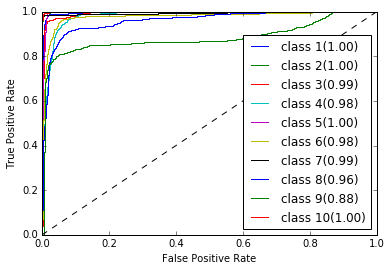

In [451]:
y_test_s4_df=pd.DataFrame(y_test_s4)
y_test_s4_df.replace('AdenomeraAndre', 0, inplace = True)
y_test_s4_df.replace('AdenomeraHylaedactylus', 1, inplace = True)
y_test_s4_df.replace('Ameeregatrivittata', 2, inplace = True)
y_test_s4_df.replace('HylaMinuta', 3, inplace = True)
y_test_s4_df.replace('HypsiboasCinerascens',4, inplace = True)
y_test_s4_df.replace('HypsiboasCordobae', 5, inplace = True)
y_test_s4_df.replace('LeptodactylusFuscus', 6, inplace = True)
y_test_s4_df.replace('OsteocephalusOophagus', 7, inplace = True)
y_test_s4_df.replace('Rhinellagranulosa', 8, inplace = True)
y_test_s4_df.replace('ScinaxRuber', 9, inplace = True)

fp_rate= {}
tp_rate= {}
R_Auc= {}
y_bin_s4 = label_binarize(y_test_s4_df, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes_s4 = y_bin_s4.shape[1]

#calulate the fp rate and tp rate by roc_curve
for i in range(n_classes_s):
    fp_rate[i], tp_rate[i], _ = roc_curve(y_bin_s4[:, i], y_scores_sst[:, i])
    #print(fp_rate[i])
    #print(tp_rate[i])
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot(fp_rate[7],tp_rate[7],label='class 8(%0.2f)'%R_Auc[7])
plt.plot(fp_rate[8],tp_rate[8],label='class 9(%0.2f)'%R_Auc[8])
plt.plot(fp_rate[9],tp_rate[9],label='class 10(%0.2f)'%R_Auc[9])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [452]:
###all hamming loss
test_y_f = X_test_b2['Family'] 
test_y_g = X_test_b2['Genus']
test_y_s = X_test_b2['Species']
tru_label = []
pre_label = []
test_y_f_list = test_y_f['Family'].values.tolist()
test_y_g_list = test_y_g['Genus'].values.tolist()
test_y_s_list = test_y_s['Species'].values.tolist()
for i in range(len(test_y_f)):
    #print(i)
    arr_list_tru = []
    arr_list_pre = []
    arr_list_tru.append(test_y_f_list[i][0])
    #print(test_y_f_list[i][0])
    arr_list_tru.append(test_y_g_list[i][0])
    arr_list_tru.append(test_y_s_list[i][0])
    arr_list_pre.append(result_smof[i])
    arr_list_pre.append(result_smog[i])
    arr_list_pre.append(result_smos[i])
    tru_label.append(arr_list_tru)
    pre_label.append(arr_list_pre)
score_list_d3 = []
for i in range(len(test_y_f)):
    score_d3 = hamming_loss(np.array(tru_label[i]), np.array(pre_label[i]))
    score_list_d3.append(score_d3)

print('The sum hamming loss is:')
print(np.mean(score_list_d3))

The sum hamming loss is:
0.06793268488497761


&nbsp;vi. Extra Practice: Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained in above.

The confusion matrices, precision, recall, roc and auc are shown above with each questions.

### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
#### &nbsp; Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate
#### &nbsp; (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.
#### &nbsp;(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.
#### &nbsp;(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance (score) between the true labels and the labels assigned by clusters.

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import hamming_loss



In [228]:
data2 = pd.read_csv('Frogs_MFCCs.csv', sep = ',', header = 0)

X_2 = data2.drop(columns=['RecordID'])

#rename the features
column_list2 = []
for i in range(1,23,1):
    column_list2.append(i)
column_list2.append('Family')
column_list2.append('Genus')
column_list2.append('Species')
X_2.columns = [column_list]


x2 = X_2[list(range(1,23,1))]
y2 = X_2['Species']
print(x2.shape)
print(y2.shape)

(7195, 22)
(7195, 1)


In [465]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter

#define a new function which uses silhouette_score to determine the best k
def kmeans(random_i):
    arr_tru = []
    arr_pre = []
    range_n_clusters = list(range(2,7195,1))
    sil_score = []
    exit_flag = False
    for n_clusters in range_n_clusters:
    
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(x2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
        silhouette_avg = silhouette_score(x2, cluster_labels)
        sil_score.append(silhouette_avg)
        if n_clusters >=3:
            if sil_score[-1] < sil_score[-2] and sil_score[-3] < sil_score[-2]:
                exit_flag = True
                break 
        if exit_flag == True:
            break
    optimalk = len(sil_score)
    clusterer = KMeans(n_clusters=optimalk, random_state = random_i)
    cluster_labels = clusterer.fit_predict(x2)

    list_label = []
    for i in list(range(0,4,1)):
        list_i = []
        count = 0
        for j in cluster_labels:
            if j == i:
                list_i.append(count)
            count +=1
        list_label.append(list_i)


    label_f_tru = X_2['Family'].values.tolist()
    label_f_pre = []
    label_g_tru = X_2['Genus'].values.tolist()
    label_g_pre = []
    label_s_tru = X_2['Species'].values.tolist()
    label_s_pre = []
    for i in list(range(0,4,1)):
        label_list_f = []
        label_list_g = []
        label_list_s = []
        for j in list_label[i]:
            label_list_f.append(label_f_tru[j][0])
            label_list_g.append(label_g_tru[j][0])
            label_list_s.append(label_s_tru[j][0])
    #print(label_list)
        c_f = Counter(label_list_f)
        pre_label = c_f.most_common(1)[0][0]
        label_f_pre.append(pre_label)
        c_g = Counter(label_list_g)
        pre_label = c_g.most_common(1)[0][0]
        label_g_pre.append(pre_label)
        c_s = Counter(label_list_s)
        pre_label = c_s.most_common(1)[0][0]
        label_s_pre.append(pre_label)

    cluster_label_list = cluster_labels.tolist()
    label_f = []
    label_g = []
    label_s = []
    for i in cluster_label_list:
        for j in list(range(0,4,1)):
            if i  == j:
                label_f.append(label_f_pre[j])
                label_g.append(label_g_pre[j])
                label_s.append(label_s_pre[j])
      
    for i in range(len(label_f_tru)):
        arr_list_tru = []
        arr_list_pre = []
        arr_list_tru.append(label_f_tru[i][0])
        arr_list_tru.append(label_g_tru[i][0])
        arr_list_tru.append(label_s_tru[i][0])
        arr_list_pre.append(label_f[i])
        arr_list_pre.append(label_g[i])
        arr_list_pre.append(label_s[i])
        arr_tru.append(arr_list_tru)
        arr_pre.append(arr_list_pre)
    score_list = []
    for i in range(len(label_f_tru)):
        score = hamming_loss(np.array(arr_tru[i]), np.array(arr_pre[i]))
        score_list.append(score)

    return np.mean(score_list)

           

In [470]:
hamming_list = []

#use random_state parameter of kmeasn to do the 50 times
for i in range(1,51,1):
    #print(i)
    hamming_score = kmeans(i)
    hamming_list.append(hamming_score)
print(np.mean(hamming_list))

0.2237535325457493


In [471]:
print(np.std(hamming_list))

0.010335099703838932


From the result , we can get that the mean of 50 times hamming loss is 0.22375, and the standard deviation is 0.0103